In [365]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [366]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [367]:
df.shape

(1599, 12)

In [368]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [369]:
df.isnull().sum().sum()

0

In [370]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

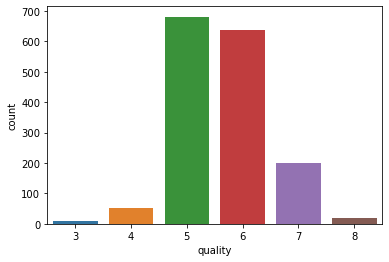

In [371]:
sns.countplot(df['quality'])
df['quality'].value_counts()

In [372]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

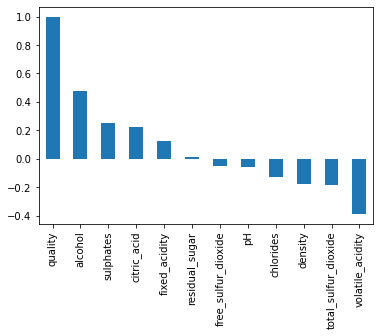

In [373]:
correlations.plot(kind='bar')

In [374]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


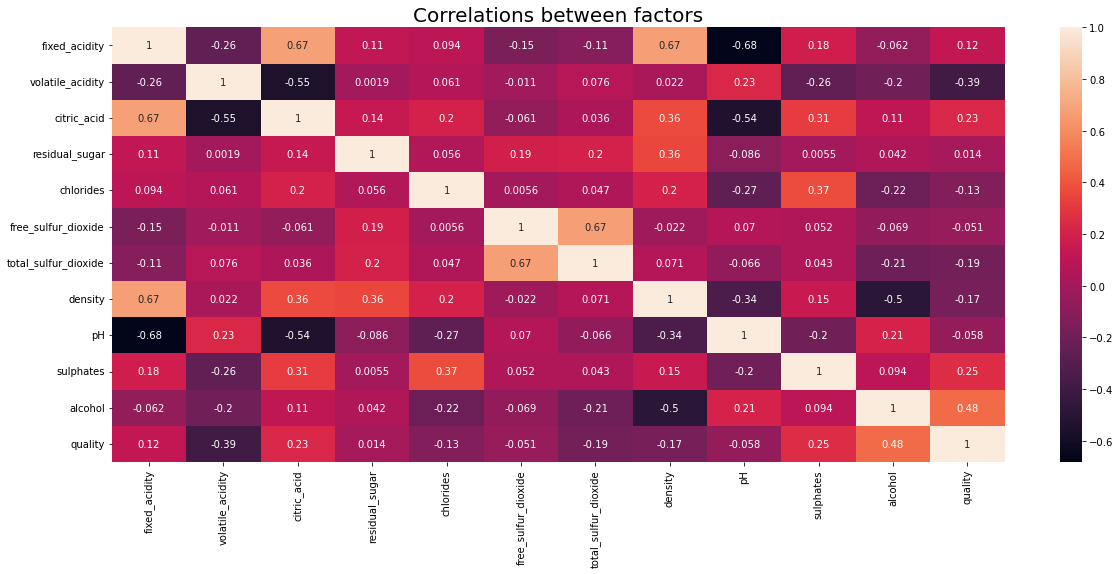

In [375]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [376]:
#From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [377]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

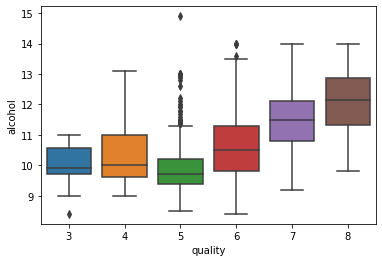

In [378]:
sns.boxplot(x='quality',y='alcohol', data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

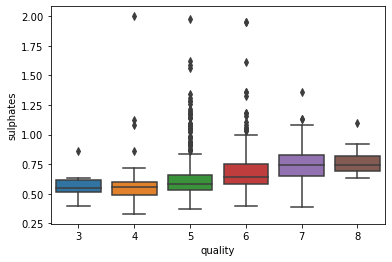

In [379]:
sns.boxplot(x='quality',y='sulphates', data=df)

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

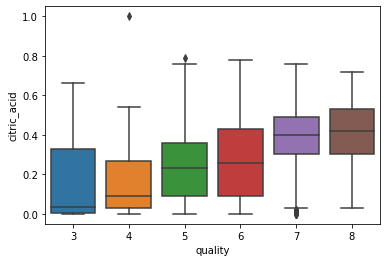

In [380]:
 sns.boxplot(x='quality',y='citric_acid', data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

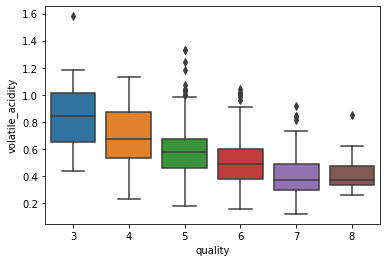

In [381]:
sns.boxplot(x='quality',y='volatile_acidity', data=df)

In [382]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2

In [383]:
#now we classify low and medium as 0 (notgood)and high as 1(good) quality wine
df_1 = df.copy()
df_1['quality'].replace([3,4],['0','0'],inplace=True)
df_1['quality'].replace([5,6],['0','0'],inplace=True)
df_1['quality'].replace([7,8],['1','1'],inplace=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

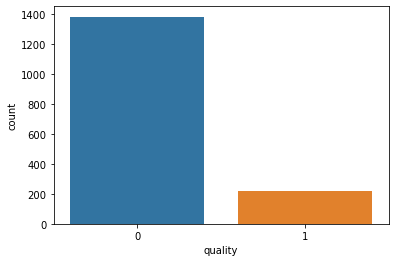

In [384]:
sns.countplot(df_1['quality'])

In [385]:
enc=OrdinalEncoder(categories=[['0','0','1']])
df_2=enc.fit_transform(df_1[['quality']])
df_2

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [386]:
df_1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [387]:
select = SelectKBest(score_func=chi2, k=5)
z= select.fit_transform(X,y)
 
print("After selecting best 5 features:", z.shape)


After selecting best 5 features: (1599, 5)


In [388]:
filter = select.get_support()
features = array(X.columns)
 
print("All features:")
print(features)
 
print("Selected best 5:")
print(features[filter])
print(z) 


All features:
['volatile_acidity' 'citric_acid' 'total_sulfur_dioxide' 'sulphates'
 'alcohol']
Selected best 5:
['volatile_acidity' 'citric_acid' 'total_sulfur_dioxide' 'sulphates'
 'alcohol']
[[7.00e-01 0.00e+00 3.40e+01 5.60e-01 9.40e+00]
 [8.80e-01 0.00e+00 6.70e+01 6.80e-01 9.80e+00]
 [7.60e-01 4.00e-02 5.40e+01 6.50e-01 9.80e+00]
 ...
 [5.10e-01 1.30e-01 4.00e+01 7.50e-01 1.10e+01]
 [6.45e-01 1.20e-01 4.40e+01 7.10e-01 1.02e+01]
 [3.10e-01 4.70e-01 4.20e+01 6.60e-01 1.10e+01]]


In [389]:
#thus by setting the value of threshold to >0.2 we will get our best features
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric_acid         0.226373
volatile_acidity   -0.390558
Name: quality, dtype: float64

In [390]:
df_2

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [391]:
X = df_1.drop(columns=['quality','fixed_acidity','residual_sugar','chlorides','free_sulfur_dioxide', 'density' ,'pH'])
y = df_1['quality']
X

,volatile_acidity,citric_acid,total_sulfur_dioxide,sulphates,alcohol
0,0.700,0.00,34.0,0.56,9.4
1,0.880,0.00,67.0,0.68,9.8
2,0.760,0.04,54.0,0.65,9.8
3,0.280,0.56,60.0,0.58,9.8
4,0.700,0.00,34.0,0.56,9.4
...,...,...,...,...,...
1594,0.600,0.08,44.0,0.58,10.5
1595,0.550,0.10,51.0,0.76,11.2
1596,0.510,0.13,40.0,0.75,11.0
1597,0.645,0.12,44.0,0.71,10.2


In [392]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [393]:
X_scaled.shape[1]

5

In [394]:
vif=pd.DataFrame()

In [395]:
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [396]:
vif["Features"]=X.columns
vif

,vif,Features
0,1.510012,volatile_acidity
1,1.515647,citric_acid
2,1.058483,total_sulfur_dioxide
3,1.128245,sulphates
4,1.087350,alcohol


In [397]:
X_scaled.shape

(1599, 5)

In [401]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    dt= DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred_train = dt.predict(x_train)
    y_pred= dt.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-1.0
At random state0,the testing accuracy is:-0.884375


At random state1,the training accuracy is:-1.0
At random state1,the testing accuracy is:-0.9


At random state2,the training accuracy is:-1.0
At random state2,the testing accuracy is:-0.878125


At random state3,the training accuracy is:-1.0
At random state3,the testing accuracy is:-0.884375


At random state4,the training accuracy is:-1.0
At random state4,the testing accuracy is:-0.89375


At random state5,the training accuracy is:-1.0
At random state5,the testing accuracy is:-0.88125


At random state6,the training accuracy is:-1.0
At random state6,the testing accuracy is:-0.859375


At random state7,the training accuracy is:-1.0
At random state7,the testing accuracy is:-0.8625


At random state8,the training accuracy is:-1.0
At random state8,the testing accuracy is:-0.884375


At random state9,the training accuracy is:-1.0
At random state9,the testing accuracy is:-0.9125


At random s

In [403]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=50)

In [404]:
x_train.shape

(1279, 5)

In [405]:
y_train.shape

(1279,)

In [406]:
x_test.shape

(320, 5)

In [407]:
y_test.shape

(320,)

In [408]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.80625

In [409]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


array([[254,  33],
       [ 29,   4]], dtype=int64)

In [410]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       287
           1       0.11      0.12      0.11        33

    accuracy                           0.81       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.82      0.81      0.81       320



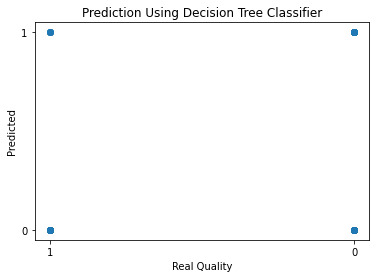

In [411]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using Decision Tree Classifier")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [412]:
from sklearn.model_selection import cross_val_score

In [430]:
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}


In [431]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_features='auto',max_depth=4)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred=dt.predict(x_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 93.4375
cross val score: 84.55172413793102


In [432]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [433]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto')

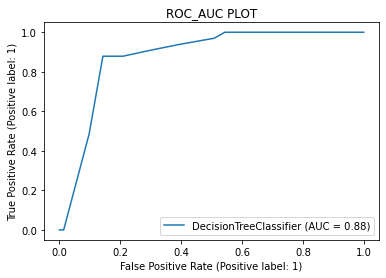

In [434]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [435]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8]}

In [436]:
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [437]:
rf=RandomForestClassifier(criterion= 'gini',max_features='auto',max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 94.0625
cross val score: 87.67946708463951


In [438]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [439]:
clf.best_estimator_

RandomForestClassifier(max_depth=8)

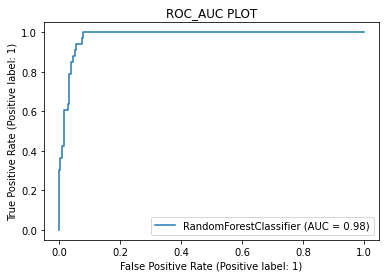

In [440]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [422]:
#so according to randomforest classifier we are getting best accuracy of 89%,which is best among all 

In [423]:
#so according to our model we have seen that their are less no of high quality wine i.e quality>7 and more no of med quality wine i.e btw 5<quality<6.......and some of low quality also ie btw 3<quality<4.

In [ ]:
#so the AUC value according to this random forest clasifier is 0.98